In [6]:
import numpy as np
arr = np.array([[[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]]).T
arr

array([[[ 1. ],
        [ 1. ],
        [ 1.2]],

       [[ 1. ],
        [ 2. ],
        [ 2.1]],

       [[ 1. ],
        [ 3. ],
        [ 3.1]],

       [[ 1. ],
        [ 4. ],
        [ 4.1]],

       [[ 1. ],
        [ 5. ],
        [ 5. ]],

       [[ 1. ],
        [ 6. ],
        [ 6. ]],

       [[ 1. ],
        [ 7. ],
        [ 7. ]],

       [[ 1. ],
        [ 8. ],
        [ 8. ]],

       [[ 1. ],
        [ 9. ],
        [ 9.1]],

       [[ 1. ],
        [10. ],
        [10.2]]])

# With Multicollinearity

In [7]:
arr.shape

(10, 3, 1)

In [8]:
arr = arr.reshape(10,3)
arr

array([[ 1. ,  1. ,  1.2],
       [ 1. ,  2. ,  2.1],
       [ 1. ,  3. ,  3.1],
       [ 1. ,  4. ,  4.1],
       [ 1. ,  5. ,  5. ],
       [ 1. ,  6. ,  6. ],
       [ 1. ,  7. ,  7. ],
       [ 1. ,  8. ,  8. ],
       [ 1. ,  9. ,  9.1],
       [ 1. , 10. , 10.2]])

In [9]:
np.linalg.inv(np.dot(arr.T,arr))

array([[  0.67713004,   1.89686099,  -1.97309417],
       [  1.89686099,  18.3309417 , -18.40807175],
       [ -1.97309417, -18.40807175,  18.49775785]])

# Changing just one point from 1 to 1.2, Standard Error is jumping drastically, diagonal numbers are changing from 18 to 24

In [10]:
arr1 = np.array([[[1,1,1,1,1,1,1,1,1,1],[1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]]).T
arr1 = arr1.reshape(10,3)
np.linalg.inv(np.dot(arr1.T,arr1))

array([[  0.579715  ,   1.55493605,  -1.62140011],
       [  1.55493605,  24.45470752, -24.42659041],
       [ -1.62140011, -24.42659041,  24.41073715]])

# Without Multicollinearity

In [11]:
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[2.4, 0.7, 4.3, 3.5, 1.6, 5.1, 6.9, 7.5, 8.1, 9.8]]).T
np.linalg.inv(np.dot(arr.T,arr))

array([[ 0.47202303, -0.06705466, -0.00051139],
       [-0.06705466,  0.06552638, -0.05891698],
       [-0.00051139, -0.05891698,  0.06515911]])

In [12]:
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1.2, 2, 3, 4, 5, 6, 7, 8, 9, 10],[2.4, 0.7, 4.3, 3.5, 1.6, 5.1, 6.9, 7.5, 8.1, 9.8]]).T
np.linalg.inv(np.dot(arr.T,arr))

array([[ 0.47750077, -0.07063042,  0.00248079],
       [-0.07063042,  0.06732664, -0.06032317],
       [ 0.00248079, -0.06032317,  0.06623309]])

# Condition Number

In [14]:
arr = np.array([[1,2],[3,4]])

np.linalg.cond(arr)

14.933034373659268

# if Cond is >30, it is said to be multicollinearity

In [16]:
arr = np.array([[[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]]).T
arr = arr.reshape(10,3)
print(np.linalg.inv(np.dot(arr.T,arr)))
np.linalg.cond(arr)

[[  0.67713004   1.89686099  -1.97309417]
 [  1.89686099  18.3309417  -18.40807175]
 [ -1.97309417 -18.40807175  18.49775785]]


170.59952333839232

In [17]:
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[2.4, 0.7, 4.3, 3.5, 1.6, 5.1, 6.9, 7.5, 8.1, 9.8]]).T
arr = arr.reshape(10,3)
print(np.linalg.inv(np.dot(arr.T,arr)))
np.linalg.cond(arr)

[[ 0.47202303 -0.06705466 -0.00051139]
 [-0.06705466  0.06552638 -0.05891698]
 [-0.00051139 -0.05891698  0.06515911]]


18.593103585331082

# Correlation

In [23]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/Advertising.csv')

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Axes: >

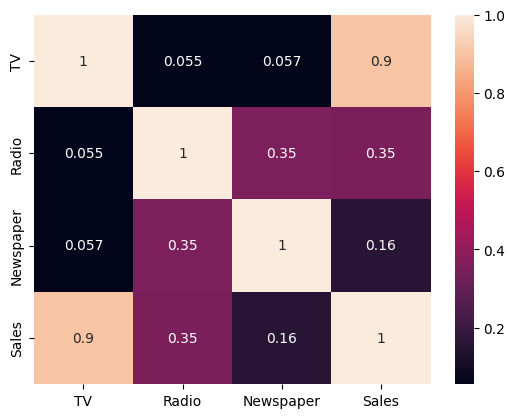

In [24]:
sns.heatmap(df.corr(),annot=True)

# VIF

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

var = []
for i in range(3):
  var.append(variance_inflation_factor(df.iloc[:,0:3],i))
var

[2.486771835198193, 3.285462100162896, 3.0552445106573853]

In [35]:
vif = pd.DataFrame({"vif":var},index = df.columns[:-1])
vif

,vif
TV,2.486772
Radio,3.285462
Newspaper,3.055245


# Remedies

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

In [43]:
X, y = make_regression(n_samples = 100, n_features = 3, noise = 0.5, random_state = 42 )
X[:5]

array([[-0.79252074,  0.50498728, -0.11473644],
       [ 0.28099187, -0.20812225, -0.62269952],
       [ 0.79103195,  1.40279431, -0.90938745],
       [ 0.62566735, -1.0708925 , -0.85715756],
       [-0.34271452, -0.16128571, -0.80227727]])

In [44]:
X[:,0][:5]

array([-0.79252074,  0.28099187,  0.79103195,  0.62566735, -0.34271452])

In [41]:
X[:,0] = X[:,1]
X[:5]

array([[ 0.50498728,  0.50498728, -0.11473644],
       [-0.20812225, -0.20812225, -0.62269952],
       [ 1.40279431,  1.40279431, -0.90938745],
       [-1.0708925 , -1.0708925 , -0.85715756],
       [-0.16128571, -0.16128571, -0.80227727]])

In [46]:
np.random.normal(size = 100)

array([-1.27314994e+00, -1.43351445e+00, -1.14300891e+00,  1.74589291e-01,
        1.54342162e+00,  1.56287634e+00, -1.93244731e-01,  4.58714818e-01,
        6.45212166e-01, -7.01144007e-01, -1.47296505e+00,  1.27668899e+00,
       -1.01055714e+00, -9.81264760e-01,  1.31019853e+00,  8.97579074e-01,
       -2.64293675e-03, -1.57532650e+00, -1.60092471e-01,  4.68754990e-01,
        1.28709182e+00,  1.53382577e-01, -8.82748133e-01, -4.12940758e-01,
       -2.97903941e-01,  1.31865813e+00, -6.93147061e-01,  1.50405398e+00,
        5.31737887e-01,  3.37689527e-01, -1.20025693e+00, -5.03847979e-01,
       -1.01386512e+00,  6.37762736e-02, -1.34510429e+00,  5.90722567e-01,
        6.03452543e-01, -4.37810309e-01,  1.32078673e+00, -5.52307393e-01,
        9.08809442e-01, -2.12945620e+00, -6.34541774e-01, -6.10120452e-01,
       -1.50290642e-01, -6.09081266e-01, -9.85529374e-02,  9.66765674e-01,
        1.78004806e-01,  1.97946902e-02, -1.00502444e+00,  3.55170464e-01,
        1.45804323e-01, -

In [48]:
np.random.seed(42)
X,y = make_regression(n_samples = 100, n_features = 3, noise = 100, random_state = 42)
X[:,0] = X[:,1]  + 0.5 * np.random.normal(size = 100)

df = pd.DataFrame(X, columns = ["X1","X2","X3"] )
df["y"] = y
df.head()

,X1,X2,X3,y
0,0.753344,0.504987,-0.114736,6.156276
1,-0.277254,-0.208122,-0.622700,-50.048544
2,1.726639,1.402794,-0.909387,-92.238077
3,-0.309378,-1.070892,-0.857158,-121.140373
4,-0.278362,-0.161286,-0.802277,19.903271


In [49]:
df.corr()

,X1,X2,X3,y
X1,1.000000,0.929901,-0.122156,0.507275
X2,0.929901,1.000000,-0.123764,0.524494
X3,-0.122156,-0.123764,1.000000,0.141844
y,0.507275,0.524494,0.141844,1.000000


# 1. Removing one feature

In [52]:
sm1 = sm.add_constant(df[["X1","X2","X3"]])
sm2 = sm.add_constant(df[["X1","X3"]])

model1 = sm.OLS(df["y"], sm1).fit()
print(model1.summary())
print("----------------------------------------------------------------------------------------------------------------------------------------")
model2 = sm.OLS(df["y"],sm2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     15.18
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           3.67e-08
Time:                        08:16:50   Log-Likelihood:                -604.38
No. Observations:                 100   AIC:                             1217.
Df Residuals:                      96   BIC:                             1227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9771     10.679      1.496      0.1

# Combining two multicollinear features

In [53]:
np.random.seed(42)
X,y = make_regression(n_samples = 100, n_features = 3, noise = 100, random_state = 42)
X[:,0] = X[:,1]  + 0.5 * np.random.normal(size = 100)

df = pd.DataFrame(X, columns = ["X1","X2","X3"] )
df["y"] = y
df.head()

,X1,X2,X3,y
0,0.753344,0.504987,-0.114736,6.156276
1,-0.277254,-0.208122,-0.622700,-50.048544
2,1.726639,1.402794,-0.909387,-92.238077
3,-0.309378,-1.070892,-0.857158,-121.140373
4,-0.278362,-0.161286,-0.802277,19.903271


In [54]:
df["X"] = (df["X1"] + df["X2"] ) / 2

sm1 = sm.add_constant(df[["X1","X2","X3"]])
sm2 = sm.add_constant(df[["X","X3"]])

model1 = sm.OLS(df["y"], sm1).fit()
print(model1.summary())
print("----------------------------------------------------------------------------------------------------------------------------------------")
model2 = sm.OLS(df["y"],sm2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     15.18
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           3.67e-08
Time:                        08:21:29   Log-Likelihood:                -604.38
No. Observations:                 100   AIC:                             1217.
Df Residuals:                      96   BIC:                             1227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9771     10.679      1.496      0.1

# PLS

In [55]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [56]:
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)


data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2', 'X3']], data['y'], test_size=0.2, random_state=42)

pls_model = PLSRegression(n_components= 2)
pls_model.fit(X_train, y_train)

y_pred = pls_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error of PLS model:", mse)

Mean squared error of PLS model: 7359.987203343638
